# 컨볼루션 신경망 프로그래밍

## LeNet-5로 필기 숫자 인식

Epoch 1/30
469/469 - 1s - loss: 0.2173 - accuracy: 0.9337 - val_loss: 0.0580 - val_accuracy: 0.9815
Epoch 2/30
469/469 - 1s - loss: 0.0554 - accuracy: 0.9833 - val_loss: 0.0342 - val_accuracy: 0.9880
Epoch 3/30
469/469 - 1s - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0288 - val_accuracy: 0.9901
Epoch 4/30
469/469 - 1s - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 5/30
469/469 - 1s - loss: 0.0223 - accuracy: 0.9934 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 6/30
469/469 - 1s - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0263 - val_accuracy: 0.9915
Epoch 7/30
469/469 - 1s - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0333 - val_accuracy: 0.9894
Epoch 8/30
469/469 - 1s - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 9/30
469/469 - 1s - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0286 - val_accuracy: 0.9918
Epoch 10/30
469/469 - 1s - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0349 - val_accuracy: 0.9914

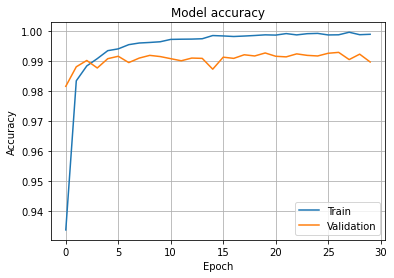

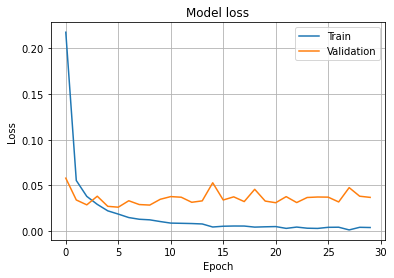

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(6, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16, (5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120, (5,5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

## 컨볼루션 신경망으로 MNIST 인식

Epoch 1/30
469/469 - 2s - loss: 0.2442 - accuracy: 0.9252 - val_loss: 0.0546 - val_accuracy: 0.9816
Epoch 2/30
469/469 - 2s - loss: 0.0886 - accuracy: 0.9738 - val_loss: 0.0396 - val_accuracy: 0.9868
Epoch 3/30
469/469 - 2s - loss: 0.0628 - accuracy: 0.9810 - val_loss: 0.0342 - val_accuracy: 0.9884
Epoch 4/30
469/469 - 2s - loss: 0.0522 - accuracy: 0.9841 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 5/30
469/469 - 2s - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 6/30
469/469 - 2s - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0297 - val_accuracy: 0.9899
Epoch 7/30
469/469 - 2s - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 8/30
469/469 - 2s - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0311 - val_accuracy: 0.9906
Epoch 9/30
469/469 - 2s - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0312 - val_accuracy: 0.9896
Epoch 10/30
469/469 - 2s - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0297 - val_accuracy: 0.9911

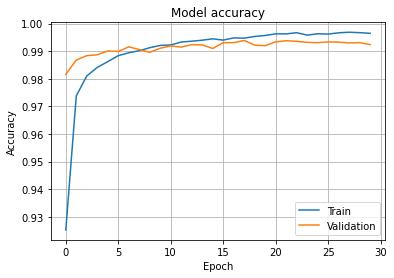

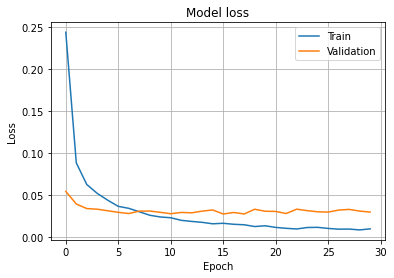

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

## 컨볼루션 신경망으로 fashion MNIST 인식

Epoch 1/70
469/469 - 3s - loss: 0.5224 - accuracy: 0.8189 - val_loss: 0.3555 - val_accuracy: 0.8693
Epoch 2/70
469/469 - 2s - loss: 0.3292 - accuracy: 0.8836 - val_loss: 0.2712 - val_accuracy: 0.9008
Epoch 3/70
469/469 - 2s - loss: 0.2777 - accuracy: 0.9007 - val_loss: 0.2588 - val_accuracy: 0.9036
Epoch 4/70
469/469 - 2s - loss: 0.2477 - accuracy: 0.9112 - val_loss: 0.2388 - val_accuracy: 0.9138
Epoch 5/70
469/469 - 2s - loss: 0.2230 - accuracy: 0.9176 - val_loss: 0.2293 - val_accuracy: 0.9160
Epoch 6/70
469/469 - 2s - loss: 0.2050 - accuracy: 0.9251 - val_loss: 0.2304 - val_accuracy: 0.9163
Epoch 7/70
469/469 - 2s - loss: 0.1875 - accuracy: 0.9314 - val_loss: 0.2200 - val_accuracy: 0.9235
Epoch 8/70
469/469 - 2s - loss: 0.1748 - accuracy: 0.9348 - val_loss: 0.2158 - val_accuracy: 0.9250
Epoch 9/70
469/469 - 2s - loss: 0.1606 - accuracy: 0.9414 - val_loss: 0.2201 - val_accuracy: 0.9252
Epoch 10/70
469/469 - 2s - loss: 0.1498 - accuracy: 0.9440 - val_loss: 0.2182 - val_accuracy: 0.9272

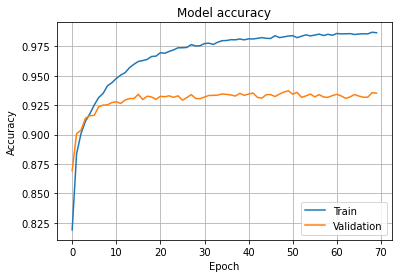

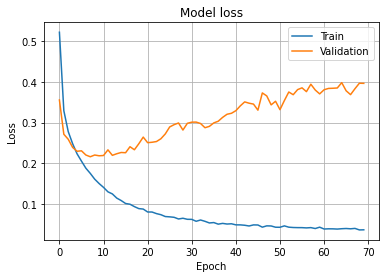

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# fashion-MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=70, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

## CNN으로 CIFAR-10 인식

Epoch 1/80
391/391 - 3s - loss: 1.6139 - accuracy: 0.4106 - val_loss: 1.2915 - val_accuracy: 0.5321
Epoch 2/80
391/391 - 3s - loss: 1.1846 - accuracy: 0.5772 - val_loss: 1.0205 - val_accuracy: 0.6368
Epoch 3/80
391/391 - 3s - loss: 1.0109 - accuracy: 0.6436 - val_loss: 0.9132 - val_accuracy: 0.6741
Epoch 4/80
391/391 - 3s - loss: 0.8979 - accuracy: 0.6852 - val_loss: 0.8531 - val_accuracy: 0.6958
Epoch 5/80
391/391 - 3s - loss: 0.8051 - accuracy: 0.7161 - val_loss: 0.8091 - val_accuracy: 0.7149
Epoch 6/80
391/391 - 3s - loss: 0.7299 - accuracy: 0.7414 - val_loss: 0.7509 - val_accuracy: 0.7360
Epoch 7/80
391/391 - 3s - loss: 0.6734 - accuracy: 0.7619 - val_loss: 0.7458 - val_accuracy: 0.7380
Epoch 8/80
391/391 - 3s - loss: 0.6217 - accuracy: 0.7808 - val_loss: 0.7045 - val_accuracy: 0.7582
Epoch 9/80
391/391 - 3s - loss: 0.5681 - accuracy: 0.8004 - val_loss: 0.7124 - val_accuracy: 0.7544
Epoch 10/80
391/391 - 3s - loss: 0.5196 - accuracy: 0.8154 - val_loss: 0.6868 - val_accuracy: 0.7683

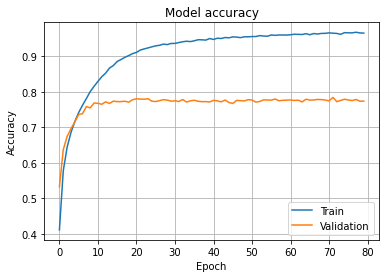

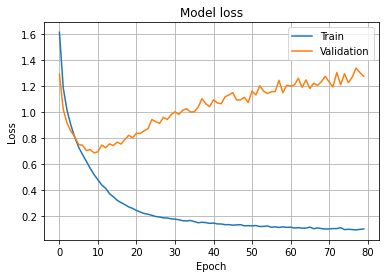

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

## 학습된 모델 저장하기

In [13]:
cnn.save('my_cnn.h5')

## 학습된 모델 불러 사용하기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn = tf.keras.models.load_model('my_cnn.h5')
cnn.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은 ", res[1]*100)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)         

# 컨볼루션 신경망의 시각화

## 커널과 특징 맵의 시각화

Epoch 1/30
391/391 - 3s - loss: 1.6730 - accuracy: 0.3874 - val_loss: 1.2507 - val_accuracy: 0.5430
Epoch 2/30
391/391 - 3s - loss: 1.1928 - accuracy: 0.5728 - val_loss: 0.9786 - val_accuracy: 0.6482
Epoch 3/30
391/391 - 3s - loss: 0.9936 - accuracy: 0.6514 - val_loss: 0.8532 - val_accuracy: 0.7029
Epoch 4/30
391/391 - 3s - loss: 0.8616 - accuracy: 0.6975 - val_loss: 0.8115 - val_accuracy: 0.7125
Epoch 5/30
391/391 - 3s - loss: 0.7785 - accuracy: 0.7267 - val_loss: 0.7512 - val_accuracy: 0.7353
Epoch 6/30
391/391 - 3s - loss: 0.7014 - accuracy: 0.7524 - val_loss: 0.7159 - val_accuracy: 0.7486
Epoch 7/30
391/391 - 3s - loss: 0.6421 - accuracy: 0.7730 - val_loss: 0.7289 - val_accuracy: 0.7458
Epoch 8/30
391/391 - 3s - loss: 0.5881 - accuracy: 0.7920 - val_loss: 0.6842 - val_accuracy: 0.7679
Epoch 9/30
391/391 - 3s - loss: 0.5400 - accuracy: 0.8075 - val_loss: 0.6728 - val_accuracy: 0.7673
Epoch 10/30
391/391 - 3s - loss: 0.4995 - accuracy: 0.8225 - val_loss: 0.6767 - val_accuracy: 0.7763

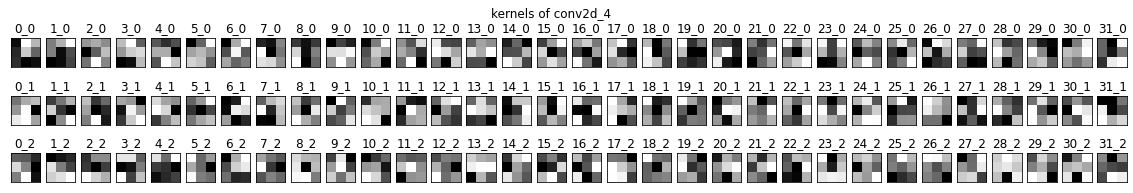

conv2d_8 (None, 32, 32, 32)
conv2d_9 (None, 32, 32, 32)
conv2d_10 (None, 16, 16, 64)
conv2d_11 (None, 16, 16, 64)
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


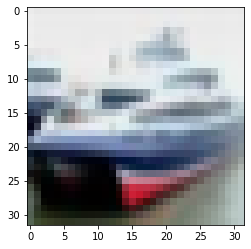

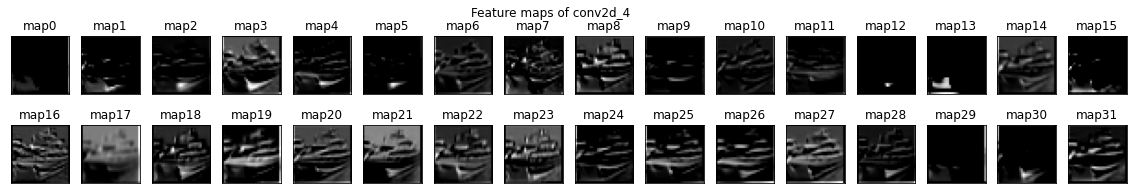

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

cnn.summary()    # cnn 모델정보 출력

# 컨볼루션층의 커널을 시각화
for layer in cnn.layers:
    if 'conv' in layer.name:
        kernel, biases = layer.get_weights()
        print(layer.name, kernel.shape)         # 커널의 텐서 모양을 출력
        
kernel, biases = cnn.layers[0].get_weights()     # 총 0의 커널 정보를 저장
minv, maxv = kernel.min(), kernel.max()
kernel=(kernel - minv) / (maxv - minv)
n_kernel = 32

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.suptitle("kernels of conv2d_4")
for i in range(n_kernel):     # i 번째 커널
    f = kernel[:, :, :, i]
    for j in range(3):        # j 번째 커널
        plt.subplot(3, n_kernel, j*n_kernel + i + 1)
        plt.imshow(f[:, :, j], cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i) + "_" + str(j))
plt.show()

# 컨볼루션층의 특징 맵을 시각화
for layer in cnn.layers:
    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)    # 특징 맵의 텐서 모양을 출력
        
from tensorflow.keras.models import Model

partial_model = Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)   # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test)    # 부분 모델로 테스트 집합을 예측
fm = feature_map[1]                          # 1번 영상의 특징 맵을 시각화
 
plt.imshow(x_test[1])                        # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32):                          # i번째 특징 맵
    plt.subplot(2, 16, i+1)
    plt.imshow(fm[:, :, i], cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

# 딥러닝의 규제

## 데이터 증대

### ImageDataGenerator로 영상 데이터셋 증대

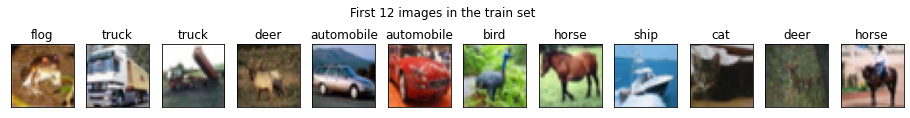

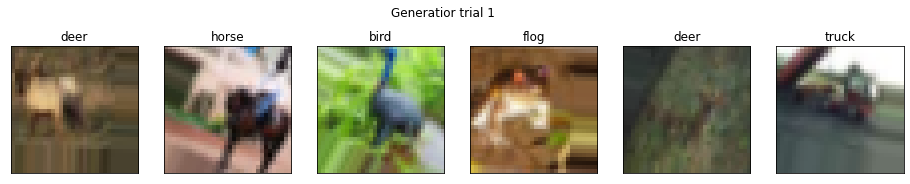

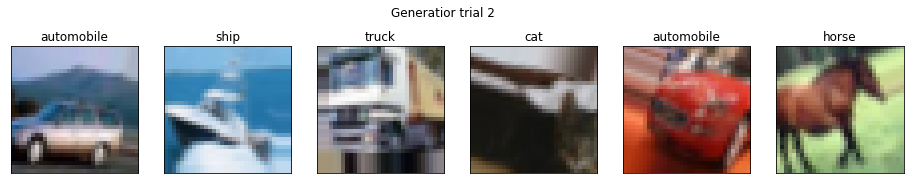

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# CIFAR-10의 부류 이름
class_names = ['airplane,', 'automobile', 'bird', 'cat', 'deer', 'dog', 'flog', 'horse', 'ship', 'truck']

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = x_train[0:12,]; y_train=y_train[0:12] # 앞 12개에 대해서만 증대 적용

# 앞 12개 영상을 그려줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
    
# 영상 증대기 생성
batch_size = 6
generator=ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_size)

# 첫 번째 증대하고 그리기
img, label = gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 1")
for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(label[i])])
    
# 두 번째 증대하고 그리기
img, label = gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 2")
for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(label[i])])

### CNN으로 CIFAR-10 인식: 데이터 증대 적용

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
391/391 - 13s - loss: 1.6207 - accuracy: 0.4070 - val_loss: 1.2014 - val_accuracy: 0.5684
Epoch 2/50
391/391 - 13s - loss: 1.2524 - accuracy: 0.5519 - val_loss: 1.0376 - val_accuracy: 0.6304
Epoch 3/50
391/391 - 13s - loss: 1.0971 - accuracy: 0.6113 - val_loss: 0.9586 - val_accuracy: 0.6626
Epoch 4/50
391/391 - 13s - loss: 0.9971 - accuracy: 0.6490 - val_loss: 0.8505 - val_accuracy: 0.7038
Epoch 5/50
391/391 - 13s - loss: 0.9270 - accuracy: 0.6764 - val_loss: 0.8359 - val_accuracy: 0.7059
Epoch 6/50
391/391 - 13s - loss: 0.8740 - accuracy: 0.6929 - val_loss: 0.7887 - val_accuracy: 0.7224
Epoch 7/50
391/391 - 13s - loss: 0.8273 - accuracy: 0.7104 - val_loss: 0.7383 - val_accuracy: 0.7445
Epoch 8/50
391/391 - 13s - loss: 0.8023 - accuracy: 0.7206 - val_loss: 0.7014 - val_accuracy: 0.7544
Epoch 9/50
391/391 - 13s - loss: 0.7700 - accuracy: 0.7324 - val_loss: 0.6863 - val_accuracy: 0.7656
Epoch 10/50
391

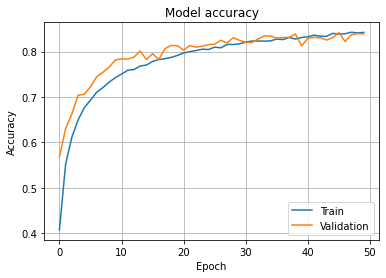

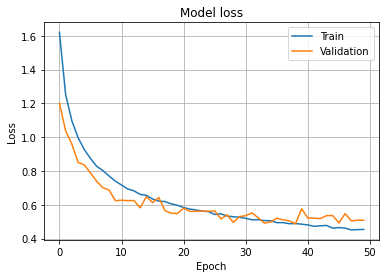

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
batch_size = 128
generator=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_size)
hist = cnn.fit_generator(generator.flow(x_train, y_train, batch_size=batch_size), epochs=50, validation_data=(x_test, y_test), verbose=2)

# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

* fit함수 대신 fit_generator 함수를 사용하여 학습 하면서 데이터 증대를 실행한다
* 학습 결과가 이전보다 높은 것을 확인할 수 있다
* 결과 그래프를 보면 학습곡선보다 validation 곡선이 더 높은 것을 알 수 있다.\
이것은 generator를 통행 학습하면서 훈련데이터가 계속 바뀌기 대문에 나타나 결과이다.

### 교차검증으로 드롭아웃의 성능 향상 효과 측정

드롭아웃 적용 안 할 때: 0.7361200094223023
드롭아웃 적용할 때: 0.7625800013542176


{'whiskers': [<matplotlib.lines.Line2D at 0x22f733239a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f733060a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f73323640>,
 'medians': [<matplotlib.lines.Line2D at 0x22f73306760>,
 'fliers': [<matplotlib.lines.Line2D at 0x22f73306ac0>,
 'means': []}

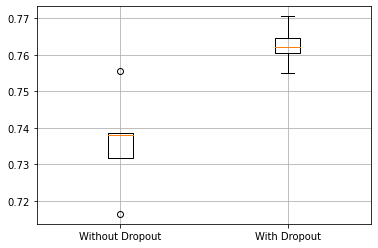

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 하이퍼 매개변수 설정
batch_size = 128
n_epoch = 10
k = 5

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        # 훈련 집합과 검증 집합으로 분할
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        
        # 신경망 모델 설계
        cnn = Sequential()
        cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
        cnn.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64, (3,3), activation='relu'))
        cnn.add(Conv2D(64, (3,3), activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512, activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10, activation='softmax'))
        
        # 신경망 모델 학습
        cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
        hist = cnn.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=0)
        accuracy.append(cnn.evaluate(xval, yval, verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout = cross_validation([0.0, 0.0, 0.0])
acc_with_dropout = cross_validation([0.25, 0.25, 0.5])

print("드롭아웃 적용 안 할 때:", np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때:", np.array(acc_with_dropout).mean())
        
import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout, acc_with_dropout], labels=["Without Dropout", "With Dropout"]);

#### 가중치 감쇠

* 가중치 값이 수천~ 수만을 넘는 경우 학습을 할 때 오버피팅이 발생할 수 있다.
* 큰 가중치는 오버피팅이 발생하는 주요 원인으로 밝혀짐
* 따라서 성능을 유지한 채로 가중치의 크기를 낮출 ㅅ ㅜ있는 방법 -> 가중치 감쇠(weight decay)
    * 절댓값을 사용하는 규제 기법을 L1 가중치 감쇠 -> 라소 정규화
    * 제곱을 사용하는 기법을 L2 가중치 감쇠라 부른다. -> 리지 정규화
* Tensorflow에서는 3가지 매계변수로
    * kernel_regularizer 가중치에 적용
    * bias_regularizer 바이어스에 적용
    * activity_regularizer 활성 함수의 결과에 적용

### 교차 검증으로 제거 조사